In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [66]:
house = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [67]:
house.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [68]:
# no null values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [69]:
house.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [70]:
# checking for null values
house[house.isnull().any(axis=1)]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test = train_test_split(house, test_size=0.2, random_state=48)

<function matplotlib.pyplot.show(close=None, block=None)>

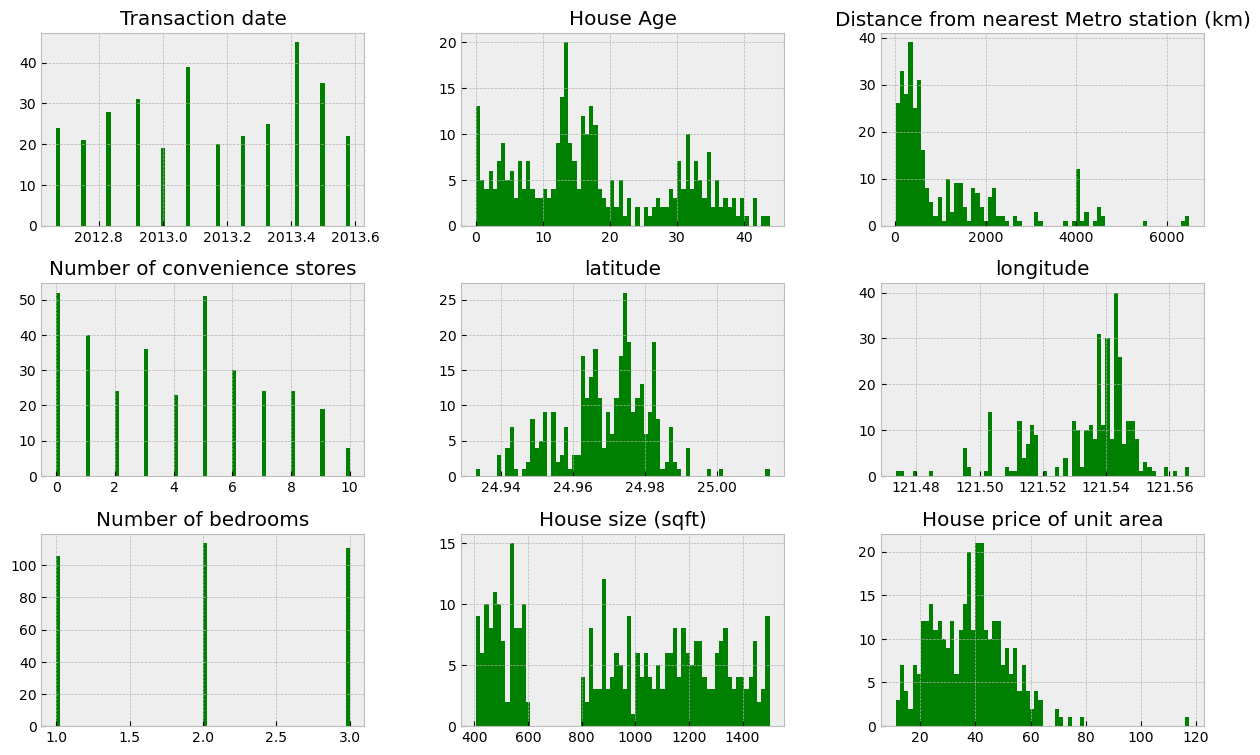

In [73]:
X_train.hist(bins=70, figsize=(15,9), color='green')
plt.show

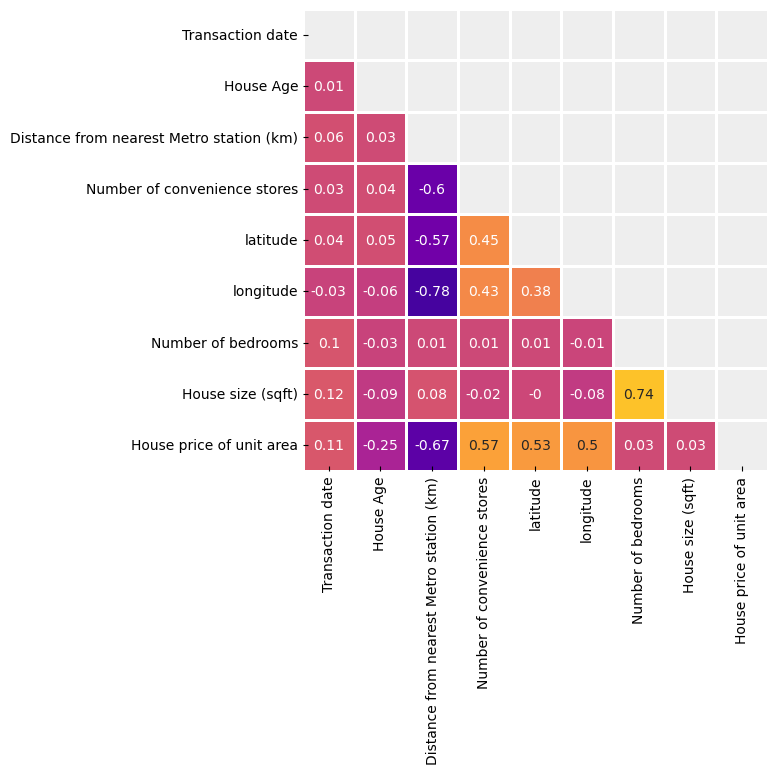

In [74]:
def corrMat(house, id=False):
    corr_mat = house.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, center=0,\
        cmap='plasma', square=False, lw=1, annot=True, cbar=False)
plt.show()
corrMat(X_train)

<AxesSubplot:xlabel='House price of unit area'>

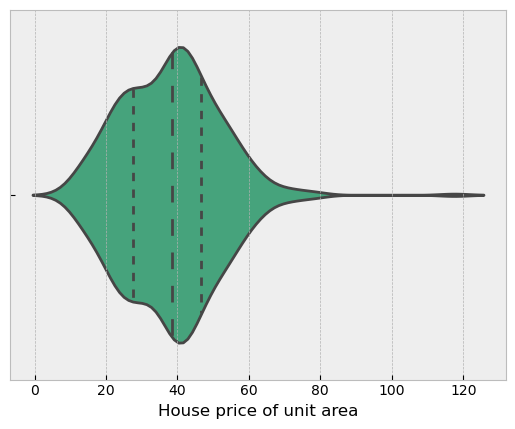

In [75]:
sns.violinplot(x=house['House price of unit area'], inner="quartile", color="#36B37E")

/Users/vaibhavk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House price of unit area'>

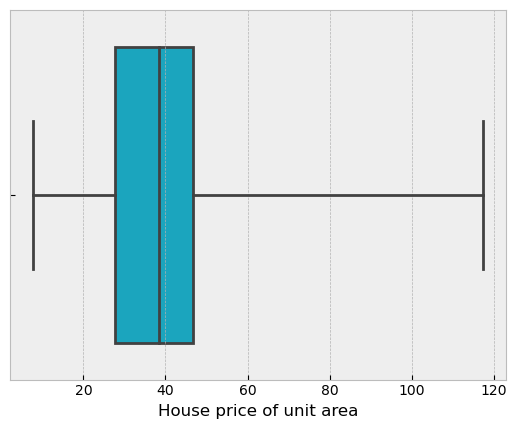

In [92]:
sns.boxplot(house['House price of unit area'], whis=10, color='#00B8D9')

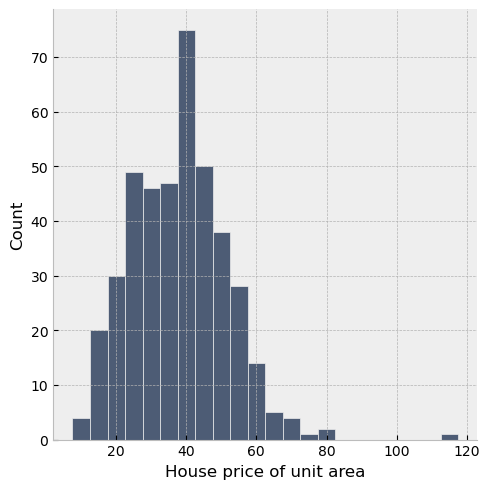

In [97]:
sns.displot(house['House price of unit area'], kde=False, color='#172B4D',\
)
# plt.xlabel('sales')

In [85]:
house.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

Text(0, 0.5, 'price')

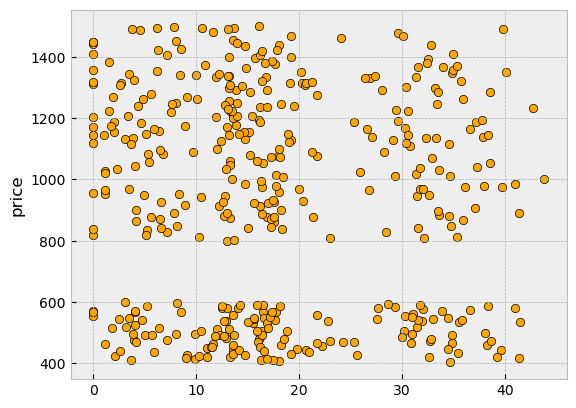

In [91]:
plt.scatter(x=house['House Age'], y=house['House size (sqft)'],\
    color='orange', edgecolors='#000000', linewidths=0.5)
plt.ylabel("price")

<AxesSubplot:>

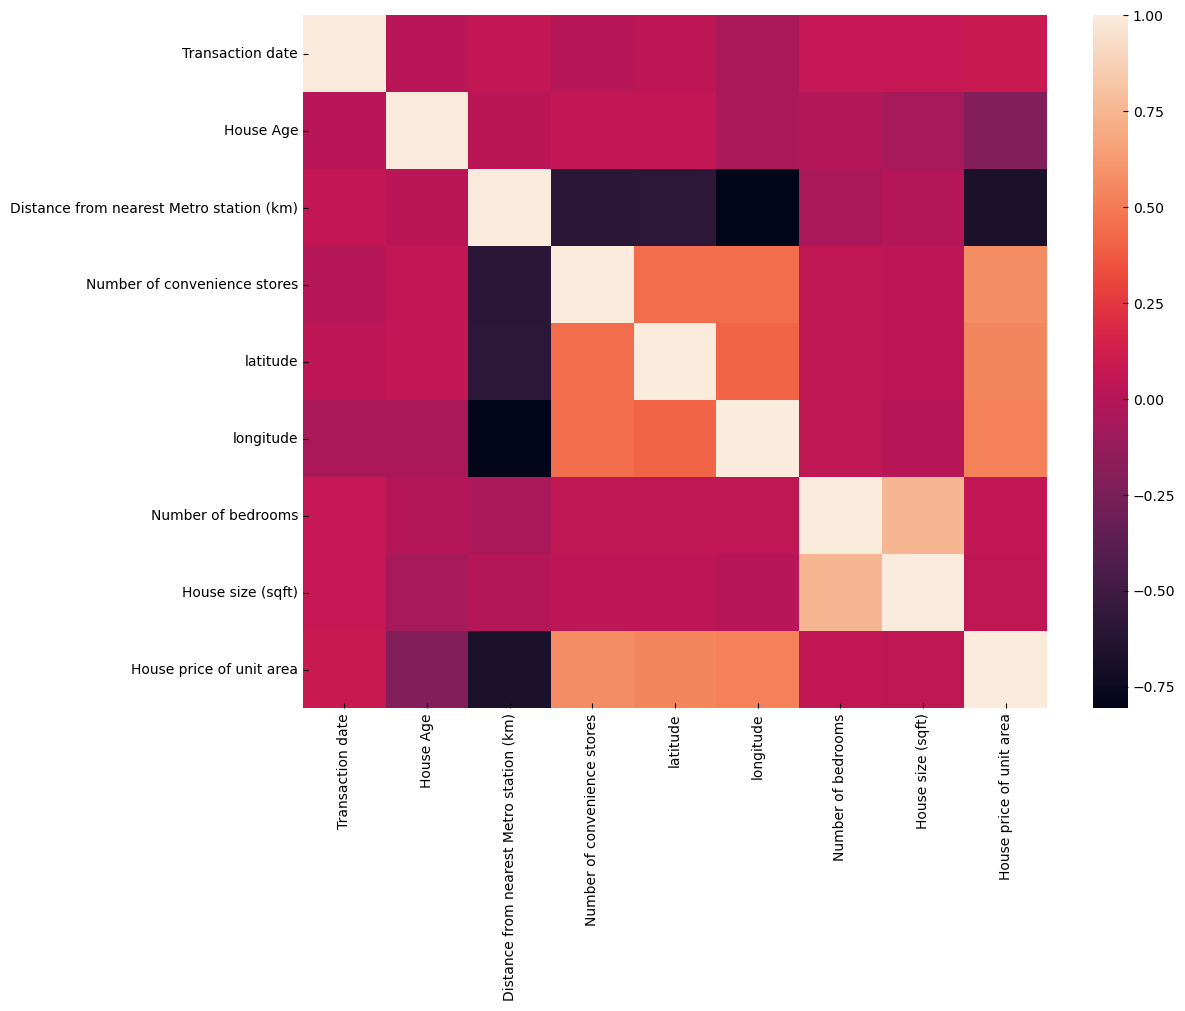

In [98]:
fig, ax=plt.subplots(figsize=(12,9))
sns.heatmap(house.corr(), ax=ax)

Text(13.819444444444445, 0.5, 'Count')

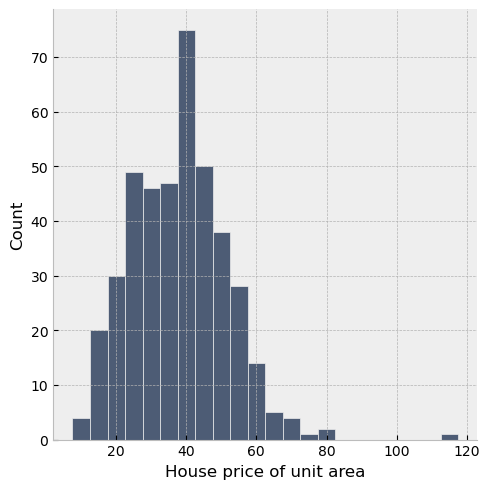

In [101]:
sns.displot(house['House price of unit area'], kde=False, 
             color="#172B4D")
plt.ylabel("Count")

Text(13.819444444444445, 0.5, 'Count')

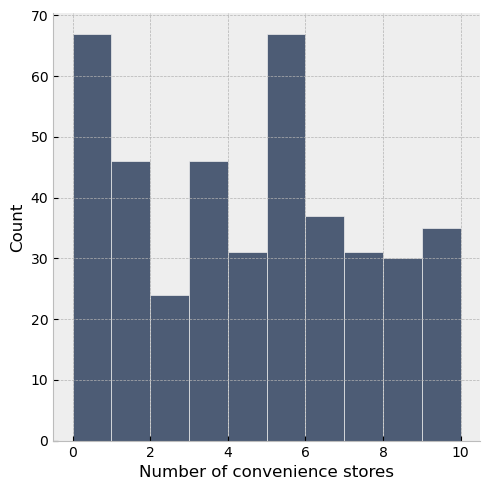

In [102]:
sns.displot(house['Number of convenience stores'], kde=False, 
             color="#172B4D")
plt.ylabel("Count")

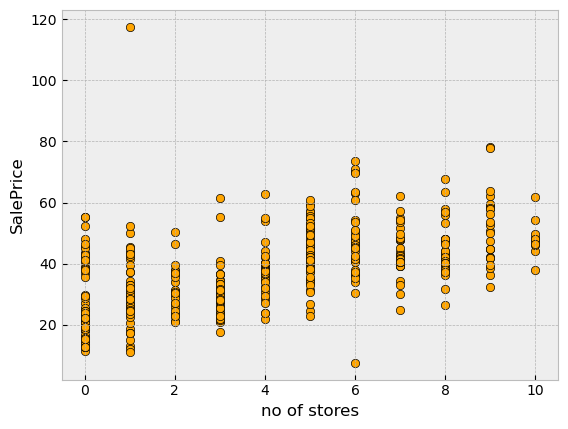

In [105]:
plt.scatter(x=house['Number of convenience stores'], y=house['House price of unit area'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("no of stores"); plt.ylabel("SalePrice");

Text(4.944444444444445, 0.5, 'Count')

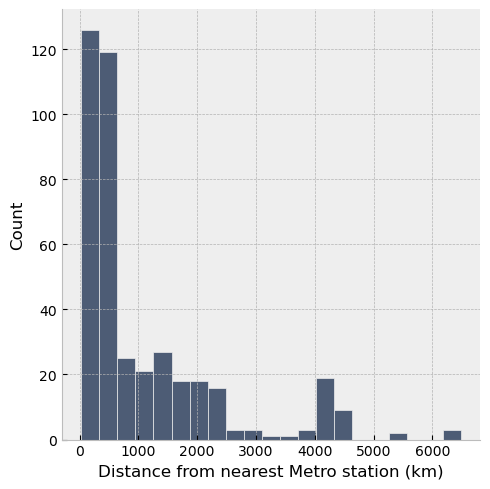

In [103]:
sns.displot(house['Distance from nearest Metro station (km)'], kde=False, 
             color="#172B4D")
plt.ylabel("Count")

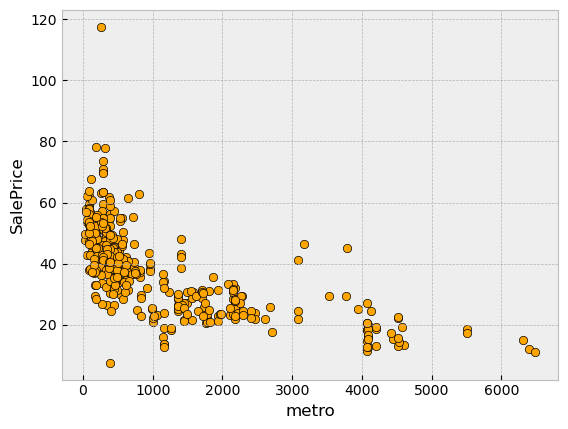

In [106]:
plt.scatter(x=house['Distance from nearest Metro station (km)'], y=house['House price of unit area'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("metro"); plt.ylabel("SalePrice");